## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 64
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9843891	total: 58.7ms	remaining: 58.6s
1:	learn: 0.9654563	total: 59.6ms	remaining: 29.8s
2:	learn: 0.9458395	total: 60.6ms	remaining: 20.1s
3:	learn: 0.9281633	total: 61.7ms	remaining: 15.4s
4:	learn: 0.9115267	total: 62.7ms	remaining: 12.5s
5:	learn: 0.8972109	total: 63.6ms	remaining: 10.5s
6:	learn: 0.8796831	total: 64.6ms	remaining: 9.17s
7:	learn: 0.8632850	total: 65.5ms	remaining: 8.13s
8:	learn: 0.8483129	total: 66.4ms	remaining: 7.31s
9:	learn: 0.8317939	total: 67.2ms	remaining: 6.66s
10:	learn: 0.8168781	total: 68.1ms	remaining: 6.12s
11:	learn: 0.8018487	total: 68.9ms	remaining: 5.68s
12:	learn: 0.7868753	total: 69.7ms	remaining: 5.29s
13:	learn: 0.7715963	total: 70.6ms	remaining: 4.97s
14:	learn: 0.7589389	total: 71.3ms	remaining: 4.68s
15:	learn: 0.7453784	total: 72.2ms	remaining: 4.44s
16:	learn: 0.7339494	total: 73.1ms	remaining: 4.23s
17:	learn: 0.7216510	total: 74ms	remaining: 4.04s
18:	learn: 0.7092113	total: 74.8ms	remaining: 

53:	learn: 0.4495339	total: 109ms	remaining: 1.91s
54:	learn: 0.4451092	total: 110ms	remaining: 1.89s
55:	learn: 0.4415913	total: 111ms	remaining: 1.87s
56:	learn: 0.4367186	total: 112ms	remaining: 1.85s
57:	learn: 0.4327797	total: 112ms	remaining: 1.83s
58:	learn: 0.4293832	total: 113ms	remaining: 1.8s
59:	learn: 0.4264699	total: 114ms	remaining: 1.78s
60:	learn: 0.4226032	total: 115ms	remaining: 1.77s
61:	learn: 0.4181415	total: 116ms	remaining: 1.75s
62:	learn: 0.4150818	total: 116ms	remaining: 1.73s
63:	learn: 0.4103767	total: 117ms	remaining: 1.71s
64:	learn: 0.4077952	total: 118ms	remaining: 1.7s
65:	learn: 0.4036579	total: 119ms	remaining: 1.68s
66:	learn: 0.4002852	total: 120ms	remaining: 1.67s
67:	learn: 0.3978236	total: 120ms	remaining: 1.65s
68:	learn: 0.3945830	total: 121ms	remaining: 1.64s
69:	learn: 0.3919167	total: 122ms	remaining: 1.62s
70:	learn: 0.3891208	total: 123ms	remaining: 1.61s
71:	learn: 0.3864874	total: 124ms	remaining: 1.59s
72:	learn: 0.3839575	total: 124ms

151:	learn: 0.2667669	total: 192ms	remaining: 1.07s
152:	learn: 0.2654616	total: 193ms	remaining: 1.07s
153:	learn: 0.2646204	total: 194ms	remaining: 1.06s
154:	learn: 0.2637467	total: 194ms	remaining: 1.06s
155:	learn: 0.2626517	total: 195ms	remaining: 1.05s
156:	learn: 0.2618241	total: 196ms	remaining: 1.05s
157:	learn: 0.2611506	total: 197ms	remaining: 1.05s
158:	learn: 0.2599480	total: 198ms	remaining: 1.04s
159:	learn: 0.2591171	total: 199ms	remaining: 1.04s
160:	learn: 0.2584924	total: 199ms	remaining: 1.04s
161:	learn: 0.2576213	total: 200ms	remaining: 1.03s
162:	learn: 0.2571582	total: 201ms	remaining: 1.03s
163:	learn: 0.2568428	total: 202ms	remaining: 1.03s
164:	learn: 0.2561862	total: 203ms	remaining: 1.02s
165:	learn: 0.2555231	total: 204ms	remaining: 1.02s
166:	learn: 0.2548937	total: 204ms	remaining: 1.02s
167:	learn: 0.2543134	total: 205ms	remaining: 1.02s
168:	learn: 0.2539199	total: 206ms	remaining: 1.01s
169:	learn: 0.2536748	total: 207ms	remaining: 1.01s
170:	learn: 

279:	learn: 0.1998070	total: 298ms	remaining: 767ms
280:	learn: 0.1995949	total: 299ms	remaining: 766ms
281:	learn: 0.1992255	total: 300ms	remaining: 764ms
282:	learn: 0.1986567	total: 301ms	remaining: 763ms
283:	learn: 0.1984621	total: 302ms	remaining: 761ms
284:	learn: 0.1978889	total: 303ms	remaining: 759ms
285:	learn: 0.1977442	total: 303ms	remaining: 758ms
286:	learn: 0.1974435	total: 304ms	remaining: 756ms
287:	learn: 0.1969467	total: 305ms	remaining: 755ms
288:	learn: 0.1965791	total: 306ms	remaining: 753ms
289:	learn: 0.1964488	total: 307ms	remaining: 752ms
290:	learn: 0.1961404	total: 308ms	remaining: 750ms
291:	learn: 0.1954120	total: 309ms	remaining: 748ms
292:	learn: 0.1948704	total: 310ms	remaining: 747ms
293:	learn: 0.1944838	total: 310ms	remaining: 745ms
294:	learn: 0.1943064	total: 311ms	remaining: 744ms
295:	learn: 0.1939913	total: 312ms	remaining: 742ms
296:	learn: 0.1933719	total: 313ms	remaining: 741ms
297:	learn: 0.1929504	total: 314ms	remaining: 739ms
298:	learn: 

371:	learn: 0.1668691	total: 382ms	remaining: 644ms
372:	learn: 0.1666006	total: 383ms	remaining: 644ms
373:	learn: 0.1665270	total: 384ms	remaining: 642ms
374:	learn: 0.1661600	total: 385ms	remaining: 641ms
375:	learn: 0.1661146	total: 385ms	remaining: 640ms
376:	learn: 0.1656866	total: 386ms	remaining: 638ms
377:	learn: 0.1652540	total: 387ms	remaining: 637ms
378:	learn: 0.1651444	total: 388ms	remaining: 636ms
379:	learn: 0.1648391	total: 389ms	remaining: 635ms
380:	learn: 0.1644140	total: 390ms	remaining: 634ms
381:	learn: 0.1640617	total: 391ms	remaining: 633ms
382:	learn: 0.1638754	total: 392ms	remaining: 631ms
383:	learn: 0.1633989	total: 393ms	remaining: 630ms
384:	learn: 0.1631036	total: 393ms	remaining: 629ms
385:	learn: 0.1626755	total: 394ms	remaining: 627ms
386:	learn: 0.1623549	total: 395ms	remaining: 626ms
387:	learn: 0.1620663	total: 396ms	remaining: 625ms
388:	learn: 0.1614447	total: 397ms	remaining: 624ms
389:	learn: 0.1614024	total: 398ms	remaining: 622ms
390:	learn: 

498:	learn: 0.1378576	total: 489ms	remaining: 491ms
499:	learn: 0.1376778	total: 490ms	remaining: 490ms
500:	learn: 0.1373703	total: 491ms	remaining: 489ms
501:	learn: 0.1370561	total: 492ms	remaining: 488ms
502:	learn: 0.1368477	total: 492ms	remaining: 486ms
503:	learn: 0.1367275	total: 493ms	remaining: 485ms
504:	learn: 0.1365244	total: 494ms	remaining: 484ms
505:	learn: 0.1361171	total: 494ms	remaining: 483ms
506:	learn: 0.1360553	total: 495ms	remaining: 482ms
507:	learn: 0.1358402	total: 496ms	remaining: 480ms
508:	learn: 0.1356342	total: 497ms	remaining: 479ms
509:	learn: 0.1352425	total: 498ms	remaining: 478ms
510:	learn: 0.1349724	total: 498ms	remaining: 477ms
511:	learn: 0.1347640	total: 499ms	remaining: 476ms
512:	learn: 0.1345608	total: 500ms	remaining: 475ms
513:	learn: 0.1343184	total: 501ms	remaining: 474ms
514:	learn: 0.1340227	total: 502ms	remaining: 473ms
515:	learn: 0.1337529	total: 502ms	remaining: 471ms
516:	learn: 0.1336956	total: 503ms	remaining: 470ms
517:	learn: 

599:	learn: 0.1183499	total: 572ms	remaining: 381ms
600:	learn: 0.1180990	total: 573ms	remaining: 381ms
601:	learn: 0.1179702	total: 574ms	remaining: 380ms
602:	learn: 0.1175826	total: 575ms	remaining: 378ms
603:	learn: 0.1173901	total: 576ms	remaining: 377ms
604:	learn: 0.1172010	total: 577ms	remaining: 376ms
605:	learn: 0.1169207	total: 577ms	remaining: 375ms
606:	learn: 0.1168768	total: 578ms	remaining: 374ms
607:	learn: 0.1166969	total: 579ms	remaining: 373ms
608:	learn: 0.1166826	total: 580ms	remaining: 372ms
609:	learn: 0.1164281	total: 581ms	remaining: 371ms
610:	learn: 0.1162057	total: 582ms	remaining: 370ms
611:	learn: 0.1158981	total: 582ms	remaining: 369ms
612:	learn: 0.1156829	total: 583ms	remaining: 368ms
613:	learn: 0.1154696	total: 584ms	remaining: 367ms
614:	learn: 0.1152540	total: 585ms	remaining: 366ms
615:	learn: 0.1150314	total: 586ms	remaining: 365ms
616:	learn: 0.1147724	total: 587ms	remaining: 364ms
617:	learn: 0.1146240	total: 588ms	remaining: 363ms
618:	learn: 

728:	learn: 0.0962874	total: 680ms	remaining: 253ms
729:	learn: 0.0960418	total: 681ms	remaining: 252ms
730:	learn: 0.0958047	total: 682ms	remaining: 251ms
731:	learn: 0.0955612	total: 682ms	remaining: 250ms
732:	learn: 0.0954240	total: 683ms	remaining: 249ms
733:	learn: 0.0952539	total: 684ms	remaining: 248ms
734:	learn: 0.0951838	total: 685ms	remaining: 247ms
735:	learn: 0.0950428	total: 686ms	remaining: 246ms
736:	learn: 0.0950350	total: 687ms	remaining: 245ms
737:	learn: 0.0948381	total: 688ms	remaining: 244ms
738:	learn: 0.0946442	total: 689ms	remaining: 243ms
739:	learn: 0.0944670	total: 690ms	remaining: 242ms
740:	learn: 0.0942843	total: 690ms	remaining: 241ms
741:	learn: 0.0940998	total: 691ms	remaining: 240ms
742:	learn: 0.0940400	total: 692ms	remaining: 239ms
743:	learn: 0.0939613	total: 693ms	remaining: 238ms
744:	learn: 0.0938094	total: 694ms	remaining: 238ms
745:	learn: 0.0936587	total: 695ms	remaining: 237ms
746:	learn: 0.0935132	total: 696ms	remaining: 236ms
747:	learn: 

829:	learn: 0.0818334	total: 763ms	remaining: 156ms
830:	learn: 0.0817891	total: 764ms	remaining: 155ms
831:	learn: 0.0816772	total: 764ms	remaining: 154ms
832:	learn: 0.0815991	total: 765ms	remaining: 153ms
833:	learn: 0.0814681	total: 766ms	remaining: 152ms
834:	learn: 0.0813566	total: 767ms	remaining: 152ms
835:	learn: 0.0812239	total: 768ms	remaining: 151ms
836:	learn: 0.0812157	total: 769ms	remaining: 150ms
837:	learn: 0.0811110	total: 770ms	remaining: 149ms
838:	learn: 0.0809920	total: 770ms	remaining: 148ms
839:	learn: 0.0808389	total: 771ms	remaining: 147ms
840:	learn: 0.0808318	total: 772ms	remaining: 146ms
841:	learn: 0.0807045	total: 773ms	remaining: 145ms
842:	learn: 0.0805807	total: 774ms	remaining: 144ms
843:	learn: 0.0804652	total: 775ms	remaining: 143ms
844:	learn: 0.0803137	total: 776ms	remaining: 142ms
845:	learn: 0.0802282	total: 777ms	remaining: 141ms
846:	learn: 0.0800922	total: 777ms	remaining: 140ms
847:	learn: 0.0800030	total: 778ms	remaining: 140ms
848:	learn: 

961:	learn: 0.0688667	total: 870ms	remaining: 34.4ms
962:	learn: 0.0688091	total: 871ms	remaining: 33.5ms
963:	learn: 0.0687502	total: 872ms	remaining: 32.6ms
964:	learn: 0.0686702	total: 873ms	remaining: 31.7ms
965:	learn: 0.0685354	total: 874ms	remaining: 30.7ms
966:	learn: 0.0684418	total: 874ms	remaining: 29.8ms
967:	learn: 0.0682414	total: 875ms	remaining: 28.9ms
968:	learn: 0.0681493	total: 876ms	remaining: 28ms
969:	learn: 0.0680954	total: 877ms	remaining: 27.1ms
970:	learn: 0.0679661	total: 878ms	remaining: 26.2ms
971:	learn: 0.0678013	total: 879ms	remaining: 25.3ms
972:	learn: 0.0677058	total: 880ms	remaining: 24.4ms
973:	learn: 0.0676187	total: 881ms	remaining: 23.5ms
974:	learn: 0.0674895	total: 881ms	remaining: 22.6ms
975:	learn: 0.0674329	total: 882ms	remaining: 21.7ms
976:	learn: 0.0673146	total: 883ms	remaining: 20.8ms
977:	learn: 0.0672343	total: 884ms	remaining: 19.9ms
978:	learn: 0.0671831	total: 884ms	remaining: 19ms
979:	learn: 0.0670942	total: 885ms	remaining: 18.1

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

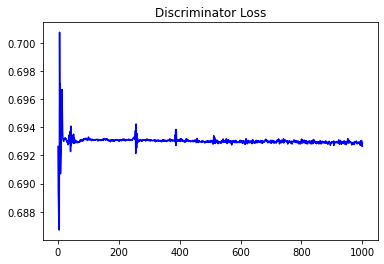

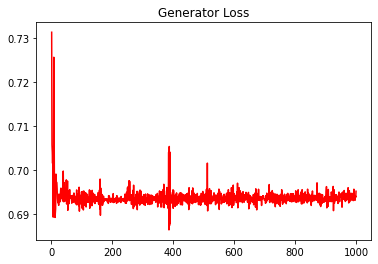

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.13389762590095133


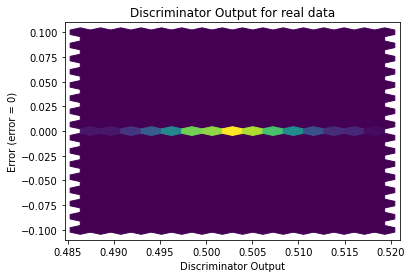

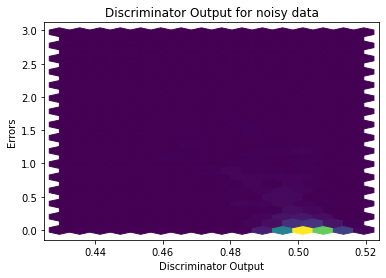

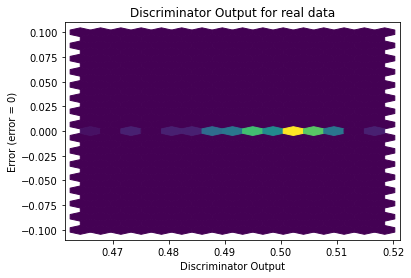

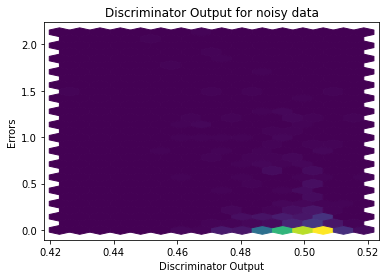

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


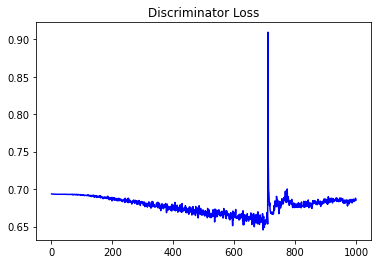

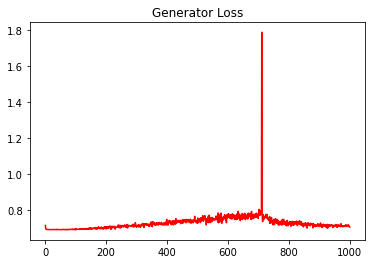

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.14962168585756785


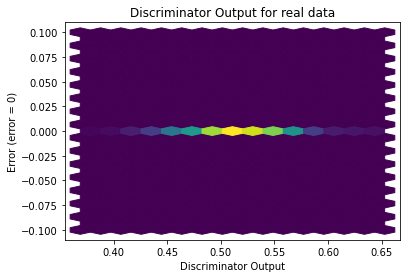

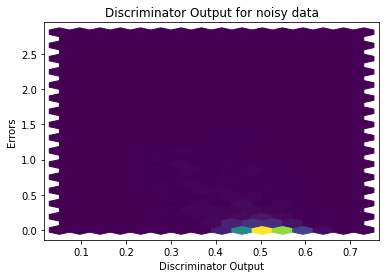

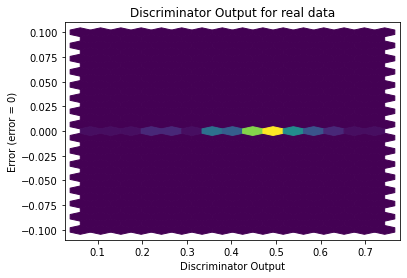

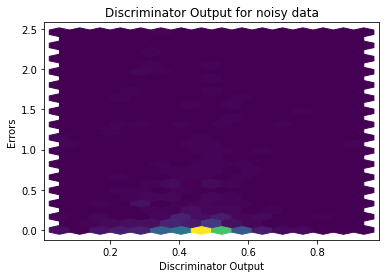

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0626]], requires_grad=True)
